In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [45]:
%matplotlib inline

# Input data

In [46]:
data_file = '/home/zyan/program/ml/datasets/PlainData.dat'

In [47]:
data = pd.read_csv(data_file,sep='\s+')

In [48]:
data.columns = ['label','process_id','lepton','photon','jet','met','ht','pt','pq']


In [49]:
data_clean_condition  = (data['pt']!=-999) & (data['pq']!=-999) &  (data['lepton']>=1) & (data['photon']>=1) & (data['jet']<=2)

In [50]:
particle_type = (data['process_id']%100==2) | (data['process_id']>1000)

In [51]:
data = data[data_clean_condition & particle_type]

In [52]:
y= data['label']
x = data.drop(['label','process_id'],axis=1)

In [53]:
x.columns

Index(['lepton', 'photon', 'jet', 'met', 'ht', 'pt', 'pq'], dtype='object')

In [54]:
scaler = preprocessing.StandardScaler().fit(x)

In [55]:
x_scaled = scaler.transform(x)

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3)

# OverSample

In [57]:
x_resample,y_resample = SMOTE().fit_sample(x_train,y_train)

In [58]:
y_train.shape

(3964744,)

In [59]:
y_resample.shape

(7866984,)

# Random Forest

In [86]:
clf = RandomForestClassifier(n_estimators=10,max_depth=15)

In [87]:
clf.fit(x_resample,y_resample)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [88]:
accuracy_score(y_resample,clf.predict(x_resample))

0.895927588005772

In [89]:
roc_auc_score(y,clf.predict(x_scaled))

0.8811221714514141

In [90]:
a = clf.predict_proba(x_scaled)[:,1]

In [91]:
data['label_pred'] = a

In [92]:
signal_plot = data[data['label']==1]['label_pred']

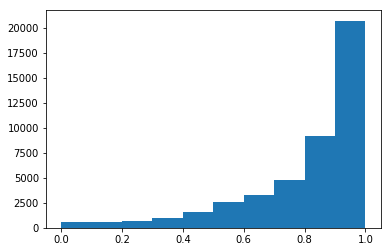

In [93]:
plt.hist(signal_plot,bins=10)
plt.show()

In [94]:
bg_plot = data[data['label']==0]['label_pred']

(array([3068194.,  569800.,  276266.,  179031.,  144188.,  121841.,
         111210.,  110150.,  112098.,  116115.,  115067.,  101978.,
          90911.,   85111.,   86750.,   70603.,   69538.,   86919.,
          91412.,   11967.]),
 array([0.        , 0.04992321, 0.09984642, 0.14976964, 0.19969285,
        0.24961606, 0.29953927, 0.34946249, 0.3993857 , 0.44930891,
        0.49923212, 0.54915533, 0.59907855, 0.64900176, 0.69892497,
        0.74884818, 0.79877139, 0.84869461, 0.89861782, 0.94854103,
        0.99846424]),
 <a list of 20 Patch objects>)

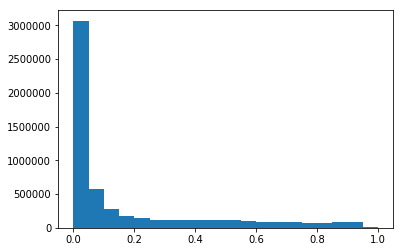

In [95]:
plt.hist(bg_plot,bins=20)